In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [102]:
data = pd.read_csv('C:\\Users\\shara\\Downloads\\dataset\\spotify-2023.csv',encoding='ISO-8859-1')

In [103]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [104]:
# Making a list out of colums in the dataframe
columns = data.columns.tolist()
print("\nColumns in the DataFrame:")
print(columns)


Columns in the DataFrame:
['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


In [105]:
# printing missing values in each column using is null()
missing_values = data.isnull().sum()
print(missing_values)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [106]:
# Make a duplicate for human-readable data.
data['in_shazam_charts_readable'] = data['in_shazam_charts']

# Remove the commas from the first column and convert to float.
data['in_shazam_charts'] = data['in_shazam_charts'].replace({',': ''}, regex=True).astype(float)

# Make a duplicate for ML processing.
data['in_shazam_charts_forML'] = data['in_shazam_charts'].copy()

# Determine the highest rank.
max_rank = data['in_shazam_charts_forML'].max()

# To make the'readable' version "Not Ranked," instead of NaN.
data['in_shazam_charts_readable'].fillna("Not Ranked", inplace=True)

# For the 'forML' version, use max_rank + 1 in place of NaN.
data['in_shazam_charts_forML'].fillna(max_rank + 1, inplace=True)

# The original 'in_shazam_charts' column should be removed.
data.drop('in_shazam_charts', axis=1, inplace=True)

In [107]:
data['in_shazam_charts_forML'] = data['in_shazam_charts_forML'].astype(int)

In [108]:
# Eliminate the rows that lack the 'key' values.
data = data.dropna(subset=['key'])

# Check to see if the rows that had missing values were eliminated.
print("Missing values after removal:", data['key'].isnull().sum())

Missing values after removal: 0


In [109]:
# Examine the data kinds that are used currently.
print("Data Types before conversion: ")
print(data.dtypes)

Data Types before conversion: 
track_name                   object
artist(s)_name               object
artist_count                  int64
released_year                 int64
released_month                int64
released_day                  int64
in_spotify_playlists          int64
in_spotify_charts             int64
streams                      object
in_apple_playlists            int64
in_apple_charts               int64
in_deezer_playlists          object
in_deezer_charts              int64
bpm                           int64
key                          object
mode                         object
danceability_%                int64
valence_%                     int64
energy_%                      int64
acousticness_%                int64
instrumentalness_%            int64
liveness_%                    int64
speechiness_%                 int64
in_shazam_charts_readable    object
in_shazam_charts_forML        int32
dtype: object


In [110]:
# Create a single datetime column by combining the fields "released_year," "released_month," and "released_day."
data['release_date'] = pd.to_datetime(data['released_year'].astype(str) + '-' + 
                                      data['released_month'].astype(str) + '-' + 
                                      data['released_day'].astype(str), errors='coerce')

# Check the new 'release_date' column
print(data['release_date'].head())

0   2023-07-14
1   2023-03-23
2   2023-06-30
3   2019-08-23
4   2023-05-18
Name: release_date, dtype: datetime64[ns]


In [111]:
# Convert "in_deezer_playlists" and "streams" to the proper numerical or categorical data types.
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')

In [112]:
# Examine updated data formats
print("Revised Data Types:")
print(data.dtypes)

Revised Data Types:
track_name                           object
artist(s)_name                       object
artist_count                          int64
released_year                         int64
released_month                        int64
released_day                          int64
in_spotify_playlists                  int64
in_spotify_charts                     int64
streams                             float64
in_apple_playlists                    int64
in_apple_charts                       int64
in_deezer_playlists                 float64
in_deezer_charts                      int64
bpm                                   int64
key                                  object
mode                                 object
danceability_%                        int64
valence_%                             int64
energy_%                              int64
acousticness_%                        int64
instrumentalness_%                    int64
liveness_%                            int64
speechiness_

In [113]:
print("Number of missing values in 'streams':", data['streams'].isna().sum())
print("Number of missing values in 'in_deezer_playlists':", data['in_deezer_playlists'].isna().sum())

Number of missing values in 'streams': 1
Number of missing values in 'in_deezer_playlists': 75


In [114]:
print(data[data['streams'].isna()])

                              track_name     artist(s)_name  artist_count  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse             1   

     released_year  released_month  released_day  in_spotify_playlists  \
574           1970               1             1                  2877   

     in_spotify_charts  streams  in_apple_playlists  ...  danceability_%  \
574                  0      NaN                  16  ...              53   

     valence_%  energy_%  acousticness_% instrumentalness_% liveness_%  \
574         75        69               7                  0         17   

     speechiness_%  in_shazam_charts_readable  in_shazam_charts_forML  \
574              3                          0                       0   

     release_date  
574    1970-01-01  

[1 rows x 26 columns]


In [115]:
# Remove the row with NaN value in 'streams' column
data = data.dropna(subset=['streams'])

# Verify if the row has been removed
print("Number of missing values in 'streams':", data['streams'].isna().sum())

Number of missing values in 'streams': 0


In [116]:
print(data[data['in_deezer_playlists'].isna()].head())

         track_name         artist(s)_name  artist_count  released_year  \
48          Starboy  The Weeknd, Daft Punk             2           2016   
54     Another Love              Tom Odell             1           2012   
55  Blinding Lights             The Weeknd             1           2019   
65           Yellow          Chris Molitor             1           1999   
73  Sweater Weather      The Neighbourhood             1           2012   

    released_month  released_day  in_spotify_playlists  in_spotify_charts  \
48               9            21                 29536                 79   
54              10            15                 18371                 83   
55              11            29                 43899                 69   
65               1             1                 31358                 43   
73               5            14                 16413                 61   

         streams  in_apple_playlists  ...  danceability_%  valence_%  \
48  2.565530e+

In [117]:
data['in_deezer_playlists'].fillna(0, inplace=True)

In [118]:
# Examine updated data types
print("Revised Data Types:")
print(data.dtypes)

Revised Data Types:
track_name                           object
artist(s)_name                       object
artist_count                          int64
released_year                         int64
released_month                        int64
released_day                          int64
in_spotify_playlists                  int64
in_spotify_charts                     int64
streams                             float64
in_apple_playlists                    int64
in_apple_charts                       int64
in_deezer_playlists                 float64
in_deezer_charts                      int64
bpm                                   int64
key                                  object
mode                                 object
danceability_%                        int64
valence_%                             int64
energy_%                              int64
acousticness_%                        int64
instrumentalness_%                    int64
liveness_%                            int64
speechiness_

In [119]:
# We're ensuring the original 'mode' and 'key' columns remain unchanged and creating new encoded columns for them

# One-Hot Encoding for 'mode' while keeping the original 'mode' column untouched
# Creating a DataFrame of one-hot encoded values
mode_encoded = pd.get_dummies(data['mode'], prefix='mode')

# Concatenating the one-hot encoded DataFrame to the original DataFrame
data = pd.concat([data, mode_encoded], axis=1)

# Label Encoding for 'key' while keeping the original 'key' column untouched
# Initiating the label encoder
label_encoder = LabelEncoder()

# Creating a new column for encoded 'key' values
data['key_encoded'] = label_encoder.fit_transform(data['key'].astype(str))

# Print updated DataFrame with new encoded columns alongside original 'mode' and 'key'
print("\nUpdated Data with Encoded Categorical Variables:")
print(data[['mode', *mode_encoded.columns, 'key', 'key_encoded']].head())


Updated Data with Encoded Categorical Variables:
    mode  mode_Major  mode_Minor key  key_encoded
0  Major           1           0   B            2
1  Major           1           0  C#            3
2  Major           1           0   F            7
3  Major           1           0   A            0
4  Minor           0           1   A            0


In [120]:
# Examine updated data types once more.
print("Revised Data Types:")
print(data.dtypes)

Revised Data Types:
track_name                           object
artist(s)_name                       object
artist_count                          int64
released_year                         int64
released_month                        int64
released_day                          int64
in_spotify_playlists                  int64
in_spotify_charts                     int64
streams                             float64
in_apple_playlists                    int64
in_apple_charts                       int64
in_deezer_playlists                 float64
in_deezer_charts                      int64
bpm                                   int64
key                                  object
mode                                 object
danceability_%                        int64
valence_%                             int64
energy_%                              int64
acousticness_%                        int64
instrumentalness_%                    int64
liveness_%                            int64
speechiness_

In [121]:
# Define the columns' percentages.
percentage_col = [
    'danceability_%', 'valence_%', 'energy_%', 
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# Print each % column's minimum and maximum values.
for col in percentage_col:
    print(f"{col}: Min = {data[col].min()}, Max = {data[col].max()}")

danceability_%: Min = 23, Max = 96
valence_%: Min = 4, Max = 97
energy_%: Min = 14, Max = 97
acousticness_%: Min = 0, Max = 97
instrumentalness_%: Min = 0, Max = 91
liveness_%: Min = 3, Max = 97
speechiness_%: Min = 2, Max = 64


In [122]:
# Make fresh columns with scaled percentages for upcoming machine learning algorithms.
for col in percentage_col:
    data[col + '_forML'] = data[col] / 100.0

In [123]:
# Examine updated data types once more.
print("Revised Data Types:")
print(data.dtypes)

Revised Data Types:
track_name                           object
artist(s)_name                       object
artist_count                          int64
released_year                         int64
released_month                        int64
released_day                          int64
in_spotify_playlists                  int64
in_spotify_charts                     int64
streams                             float64
in_apple_playlists                    int64
in_apple_charts                       int64
in_deezer_playlists                 float64
in_deezer_charts                      int64
bpm                                   int64
key                                  object
mode                                 object
danceability_%                        int64
valence_%                             int64
energy_%                              int64
acousticness_%                        int64
instrumentalness_%                    int64
liveness_%                            int64
speechiness_

In [124]:
# Transferring the information to a CSV file for PowerBI analysis
data.to_csv('top_spotify_songs.csv', index=False)

In [125]:
statistics_summary = data.describe()
print(statistics_summary)

       artist_count  released_year  released_month  released_day  \
count    857.000000     857.000000      857.000000    857.000000   
mean       1.551925    2018.297550        6.031505     13.739790   
std        0.864634      10.991135        3.567138      9.287652   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      5.000000   
50%        1.000000    2022.000000        5.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            857.000000         857.000000  8.570000e+02   
mean            5204.997666          11.959160  5.133554e+08   
std             7944.032885          19.194211  5.714855e+08   
min               31.000000           0.000000  2.762000e+03   
25%              859.000000           0.000000  1.391938e+08   
50%

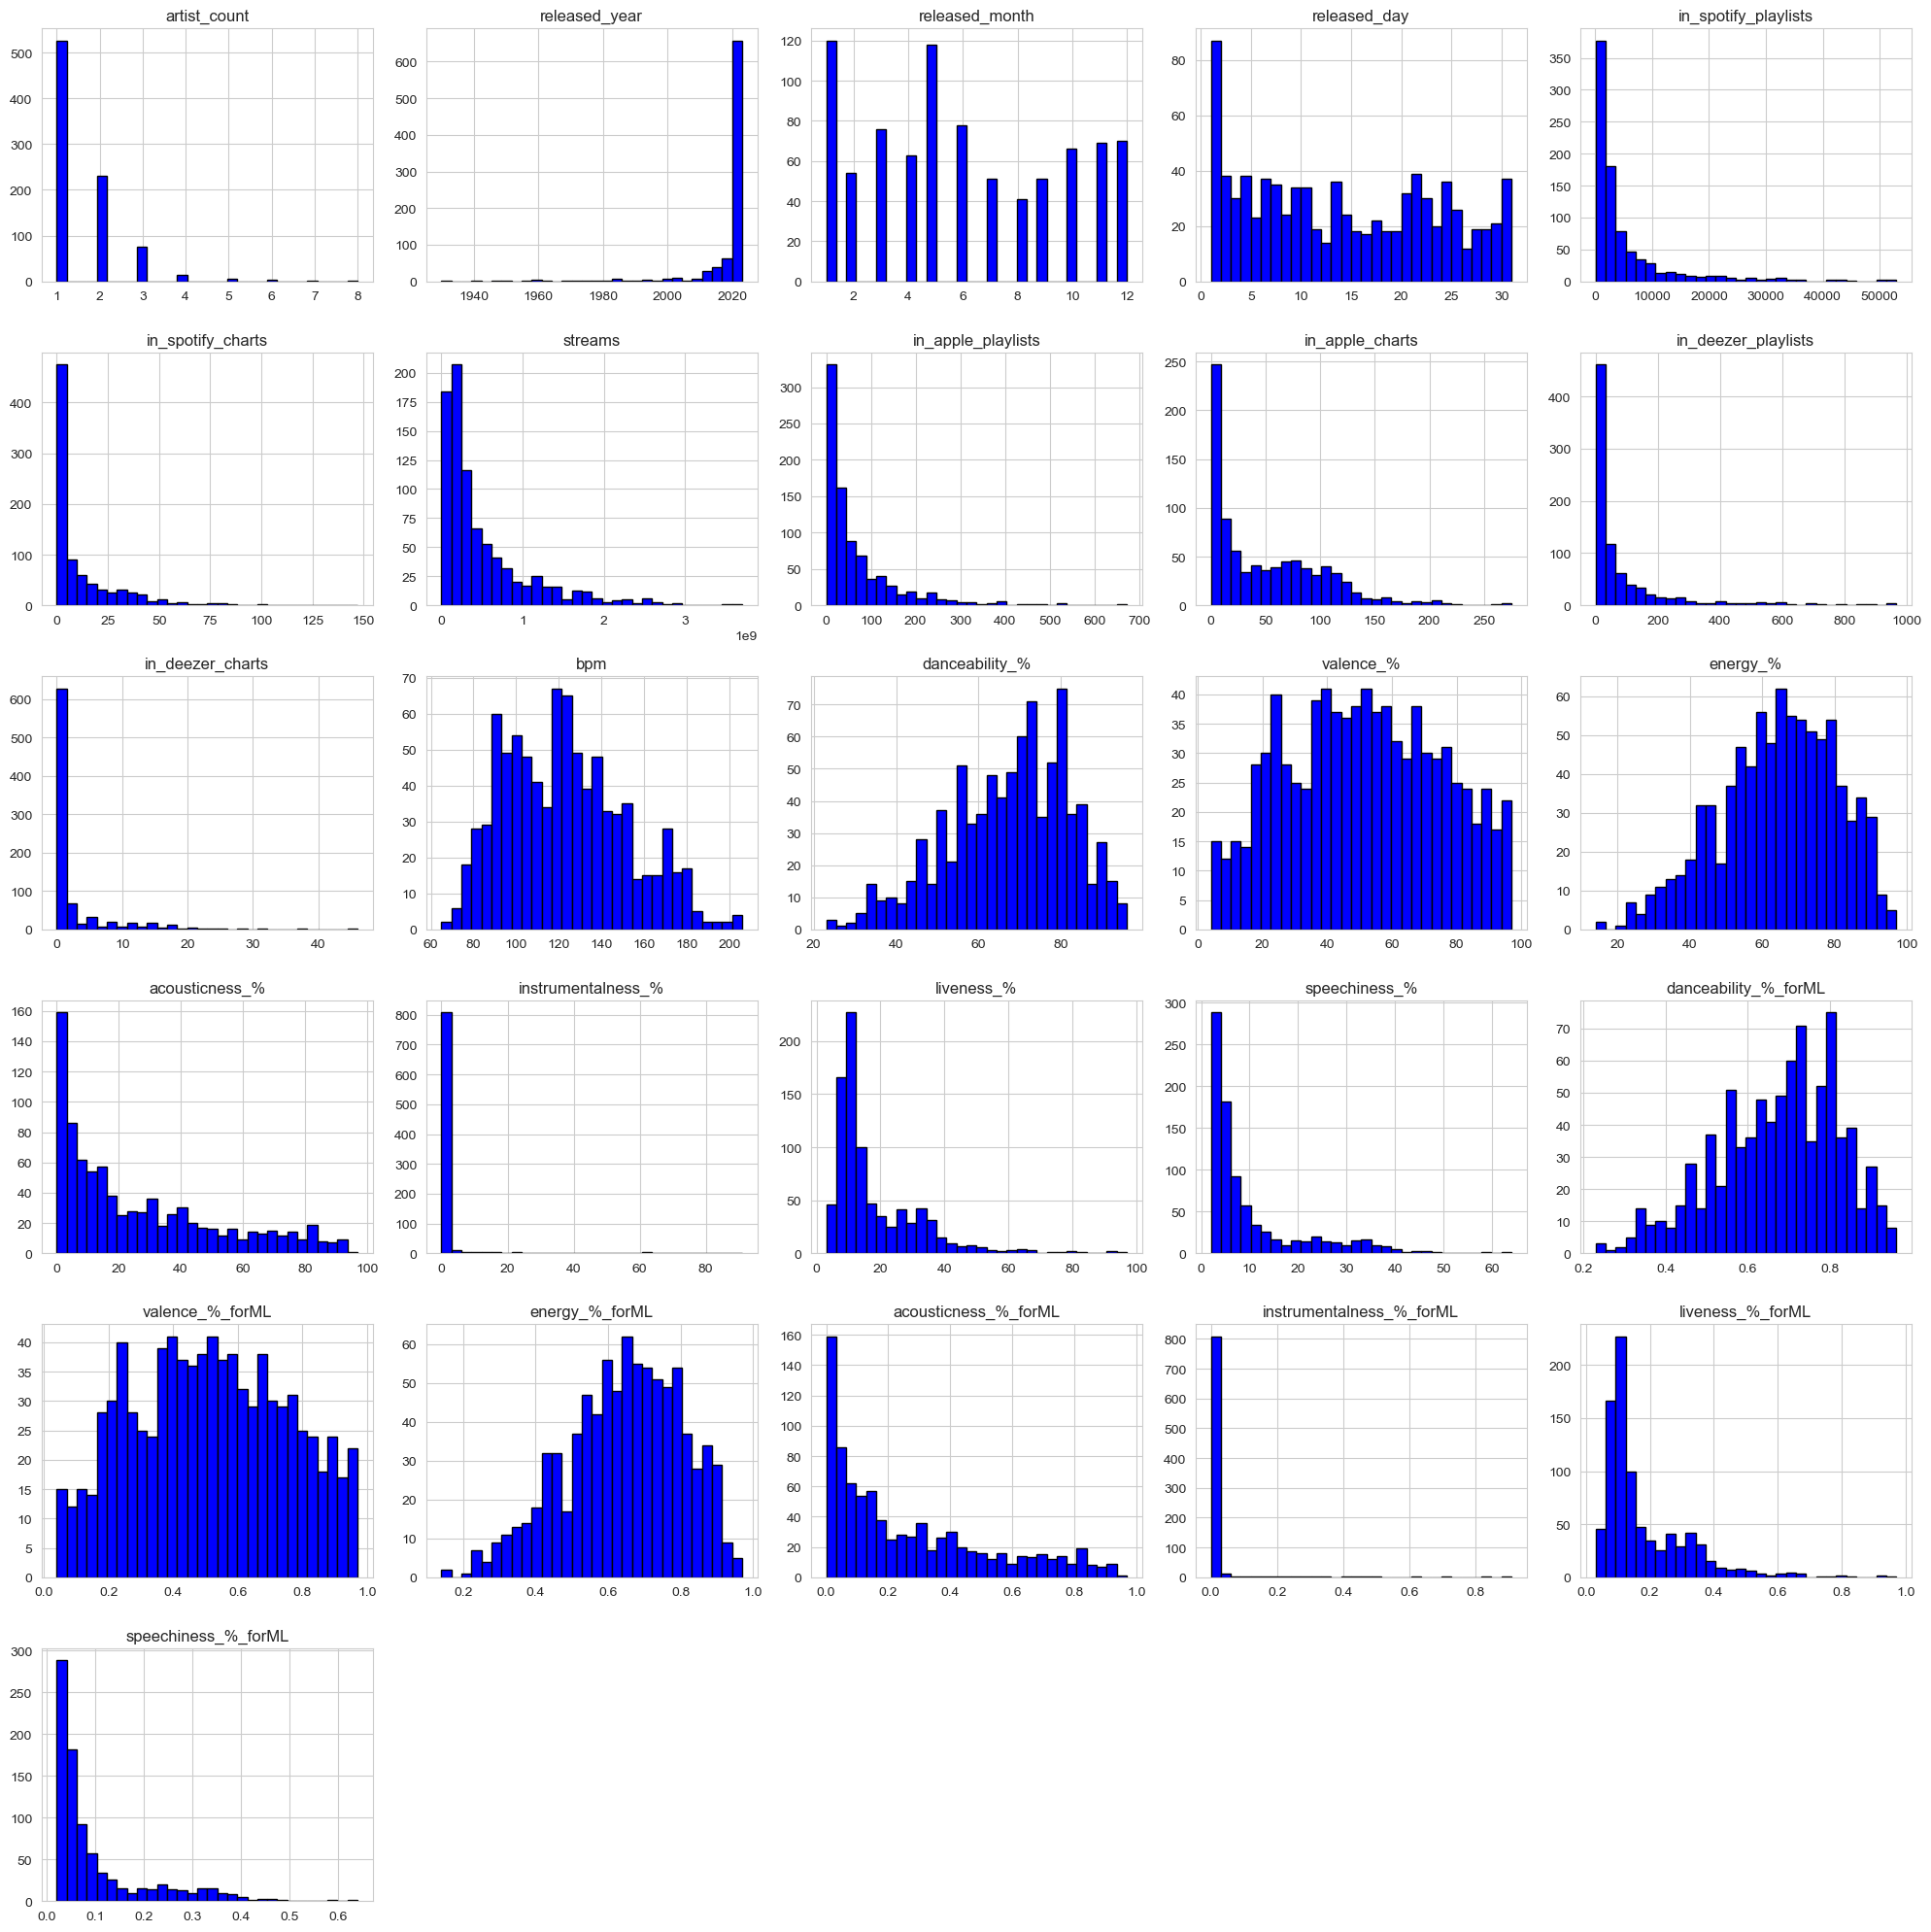

In [126]:
# Set style
sns.set_style("whitegrid")

# Plotting histograms for all numerical columns
data.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(20,20), color='blue', edgecolor='black')
plt.tight_layout()  
plt.show()

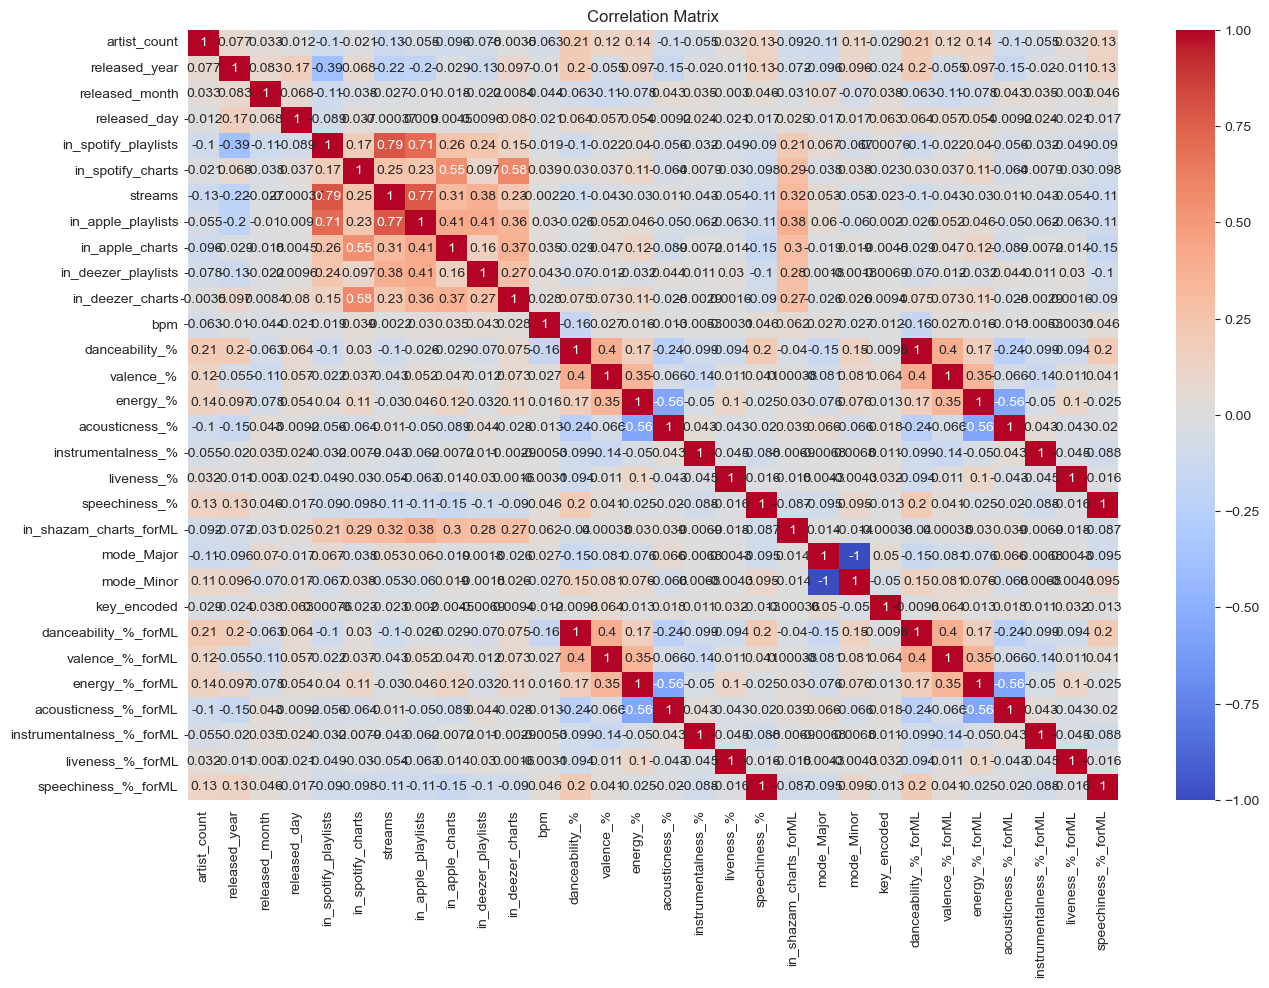

In [127]:
# Choose just columns with numbers.
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [128]:
cols_use = [
    'artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 
    'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'danceability_%_forML', 
    'valence_%_forML', 'energy_%_forML', 'acousticness_%_forML', 'instrumentalness_%_forML', 
    'liveness_%_forML', 'speechiness_%_forML', 'key_encoded'
]

# Split the data into train-validation-test sets
X = data_csv[cols_use]
y = data_csv['streams']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initiale and train the Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_reg.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 6.4641091238664904e+16
Mean Absolute Error (MAE): 164848125.36782947
R^2 Score: 0.757206458014008


In [130]:
# Predict on the test set
y_test_pred = rf_reg.predict(X_test)

# Evaluate the model(On the test set this time)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R^2 Score: {r2_test}")

# Determine which features are relevant by retrieving their importance from the random forest model.
feature_importances = rf_reg.feature_importances_
features_df = pd.DataFrame({
    'Feature': cols_use,
    'Importance': feature_importances
})

print("Feature Importances:")
print(features_df.sort_values(by='Importance', ascending=False))

Test Set Evaluation:
Mean Squared Error (MSE): 8.027459738273589e+16
Mean Absolute Error (MAE): 157612804.24627906
R^2 Score: 0.8376341129049156
Feature Importances:
                     Feature  Importance
4       in_spotify_playlists    0.756427
1              released_year    0.062276
6         in_apple_playlists    0.049071
5          in_spotify_charts    0.019744
11      danceability_%_forML    0.012847
8        in_deezer_playlists    0.012249
10                       bpm    0.010954
13            energy_%_forML    0.010483
16          liveness_%_forML    0.009797
12           valence_%_forML    0.009203
7            in_apple_charts    0.008575
14      acousticness_%_forML    0.007885
2             released_month    0.007614
3               released_day    0.007546
18               key_encoded    0.004553
9           in_deezer_charts    0.003830
17       speechiness_%_forML    0.003470
15  instrumentalness_%_forML    0.001803
0               artist_count    0.001674


In [131]:
# Define the ranges of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to initialize the RandomForestRegressor.
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Predict using the best model
y_val_pred = grid_search.best_estimator_.predict(X_val)

# Evaluate the model's performance
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Mean Squared Error (MSE): 7.1214278414255864e+16
Mean Absolute Error (MAE): 169159421.94137385
R^2 Score: 0.7325174039476677


In [132]:
# Make predictions using the test set's best model.
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model's performance on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R^2 Score: {r2_test}")

Test Set Evaluation:
Mean Squared Error (MSE): 7.638702207428792e+16
Mean Absolute Error (MAE): 157402577.58907768
R^2 Score: 0.8454972431377039


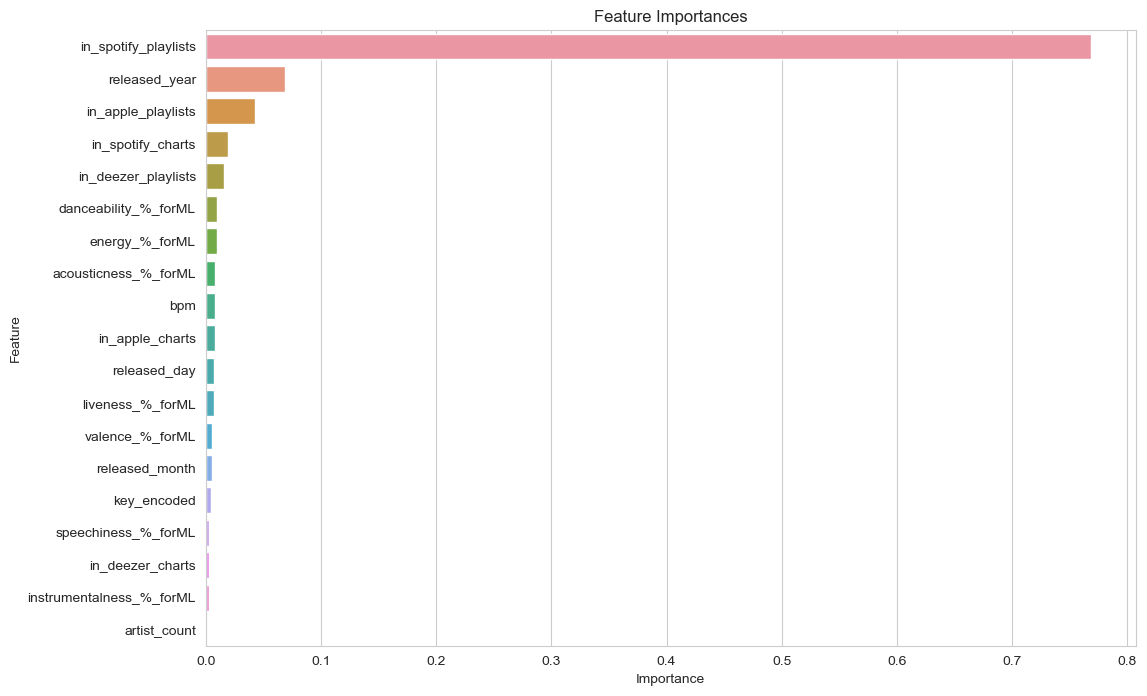

In [134]:
# Take the trained Random Forest model's feature importances and extract them.
importances = grid_search.best_estimator_.feature_importances_
features = cols_use

# Make a DataFrame with the plot and importances.
df_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=df_importances)
plt.title('Feature Importances')
plt.show()

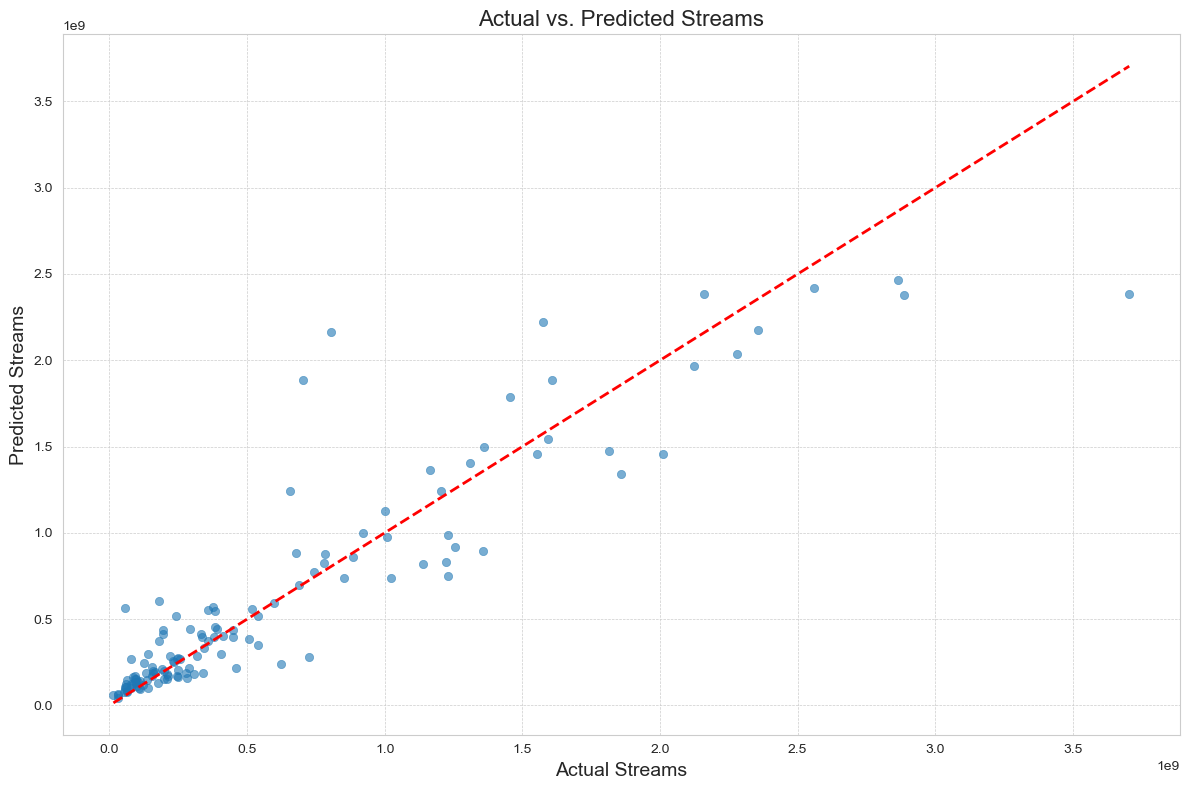

In [135]:
# Actual vs. Predicted Streams
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, edgecolor=None)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Streams', fontsize=14)
plt.ylabel('Predicted Streams', fontsize=14)
plt.title('Actual vs. Predicted Streams', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

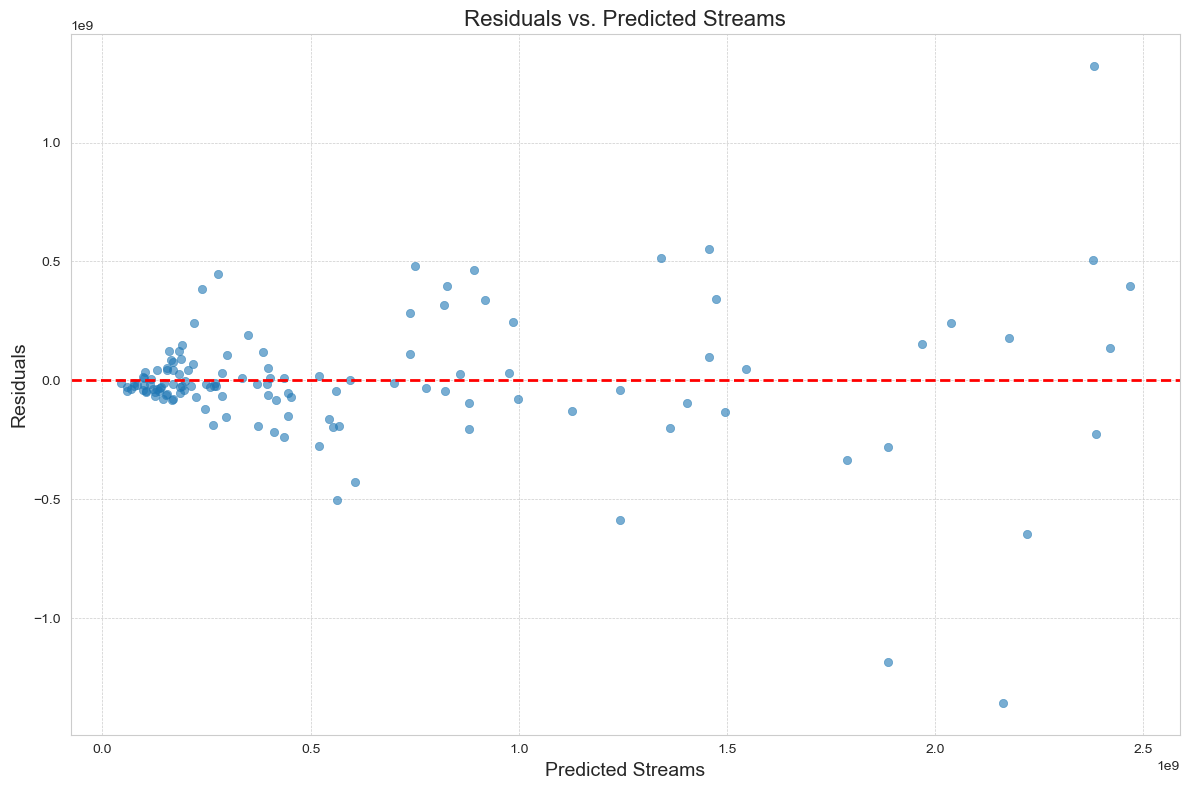

In [136]:
# Plot the residuals against predicted streams to assess model accuracy.
residuals = y_test - y_test_pred
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.6, edgecolor=None)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Streams', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs. Predicted Streams', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

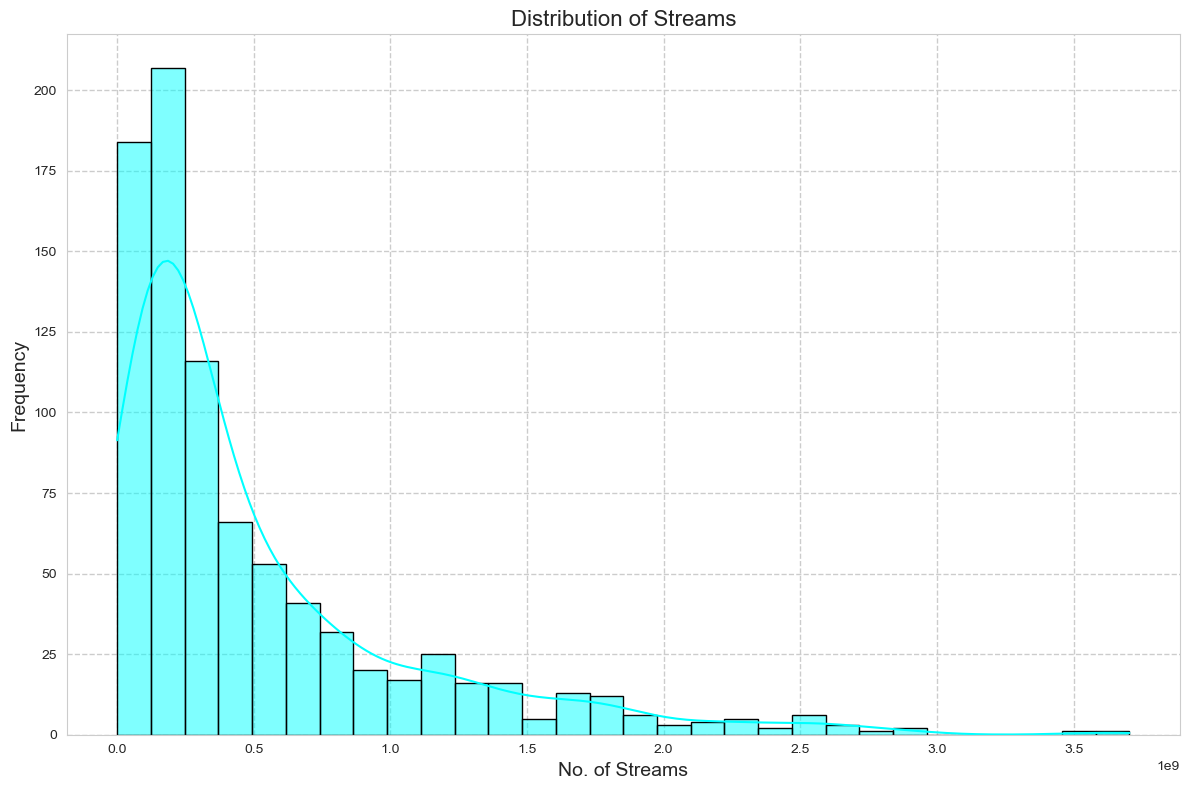

In [137]:
plt.figure(figsize=(12, 8))
sns.histplot(data['streams'], kde=True, color='cyan', edgecolor='black', bins=30)
plt.title('Distribution of Streams', fontsize=16)
plt.xlabel('No. of Streams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()